In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
data=pd.read_csv('e-shop data and description/e-shop clothing 2008.csv',';')

In [3]:
data

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,8,13,1,29,24024,2,B10,2,4,1,67,1,1
165470,2008,8,13,1,9,24025,1,A11,3,4,1,62,1,1
165471,2008,8,13,1,34,24026,1,A2,3,1,1,43,2,1
165472,2008,8,13,2,34,24026,3,C2,12,1,1,43,1,1


In [4]:
#check duplicate
data.drop_duplicates()

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,8,13,1,29,24024,2,B10,2,4,1,67,1,1
165470,2008,8,13,1,9,24025,1,A11,3,4,1,62,1,1
165471,2008,8,13,1,34,24026,1,A2,3,1,1,43,2,1
165472,2008,8,13,2,34,24026,3,C2,12,1,1,43,1,1


In [5]:
#check missing value
missing = pd.concat([data.isnull().sum(), 100 * data.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

,count,%
year,0,0.0
month,0,0.0
day,0,0.0
order,0,0.0
country,0,0.0
session ID,0,0.0
page 1 (main category),0,0.0
page 2 (clothing model),0,0.0
colour,0,0.0
location,0,0.0


In [6]:
# check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165474 entries, 0 to 165473
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   year                     165474 non-null  int64 
 1   month                    165474 non-null  int64 
 2   day                      165474 non-null  int64 
 3   order                    165474 non-null  int64 
 4   country                  165474 non-null  int64 
 5   session ID               165474 non-null  int64 
 6   page 1 (main category)   165474 non-null  int64 
 7   page 2 (clothing model)  165474 non-null  object
 8   colour                   165474 non-null  int64 
 9   location                 165474 non-null  int64 
 10  model photography        165474 non-null  int64 
 11  price                    165474 non-null  int64 
 12  price 2                  165474 non-null  int64 
 13  page                     165474 non-null  int64 
dtypes: int64(13), object

In [7]:
data['page 2 (clothing model)'].value_counts()

B4     3579
A2     3013
A11    2789
P1     2681
B10    2566
       ... 
P66      46
P22       2
P79       2
P54       1
P28       1
Name: page 2 (clothing model), Length: 217, dtype: int64

In [8]:
blank=np.zeros(data.shape[0])
data['date']=blank
for i in range(0,data.shape[0]):
    data['date'][i]=str(data['year'][i])+'-'+str(data['month'][i])+'-'+str(data['day'][i])

<ipython-input-8-b7d4b3aeff36>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'][i]=str(data['year'][i])+'-'+str(data['month'][i])+'-'+str(data['day'][i])
D:\anaconda\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [9]:
data['date']=pd.to_datetime(data['date']).dt.strftime('%Y-%m-%d')

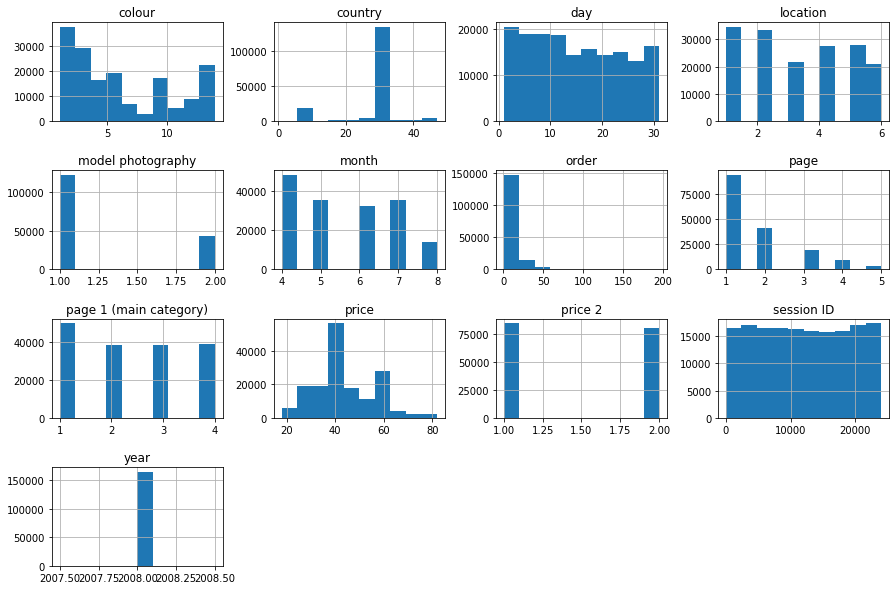

In [11]:
import matplotlib.pyplot as plt
data.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

In [12]:
data=data.rename(columns={"page 2 (clothing model)": "page2", "page 1 (main category)": "page1"})

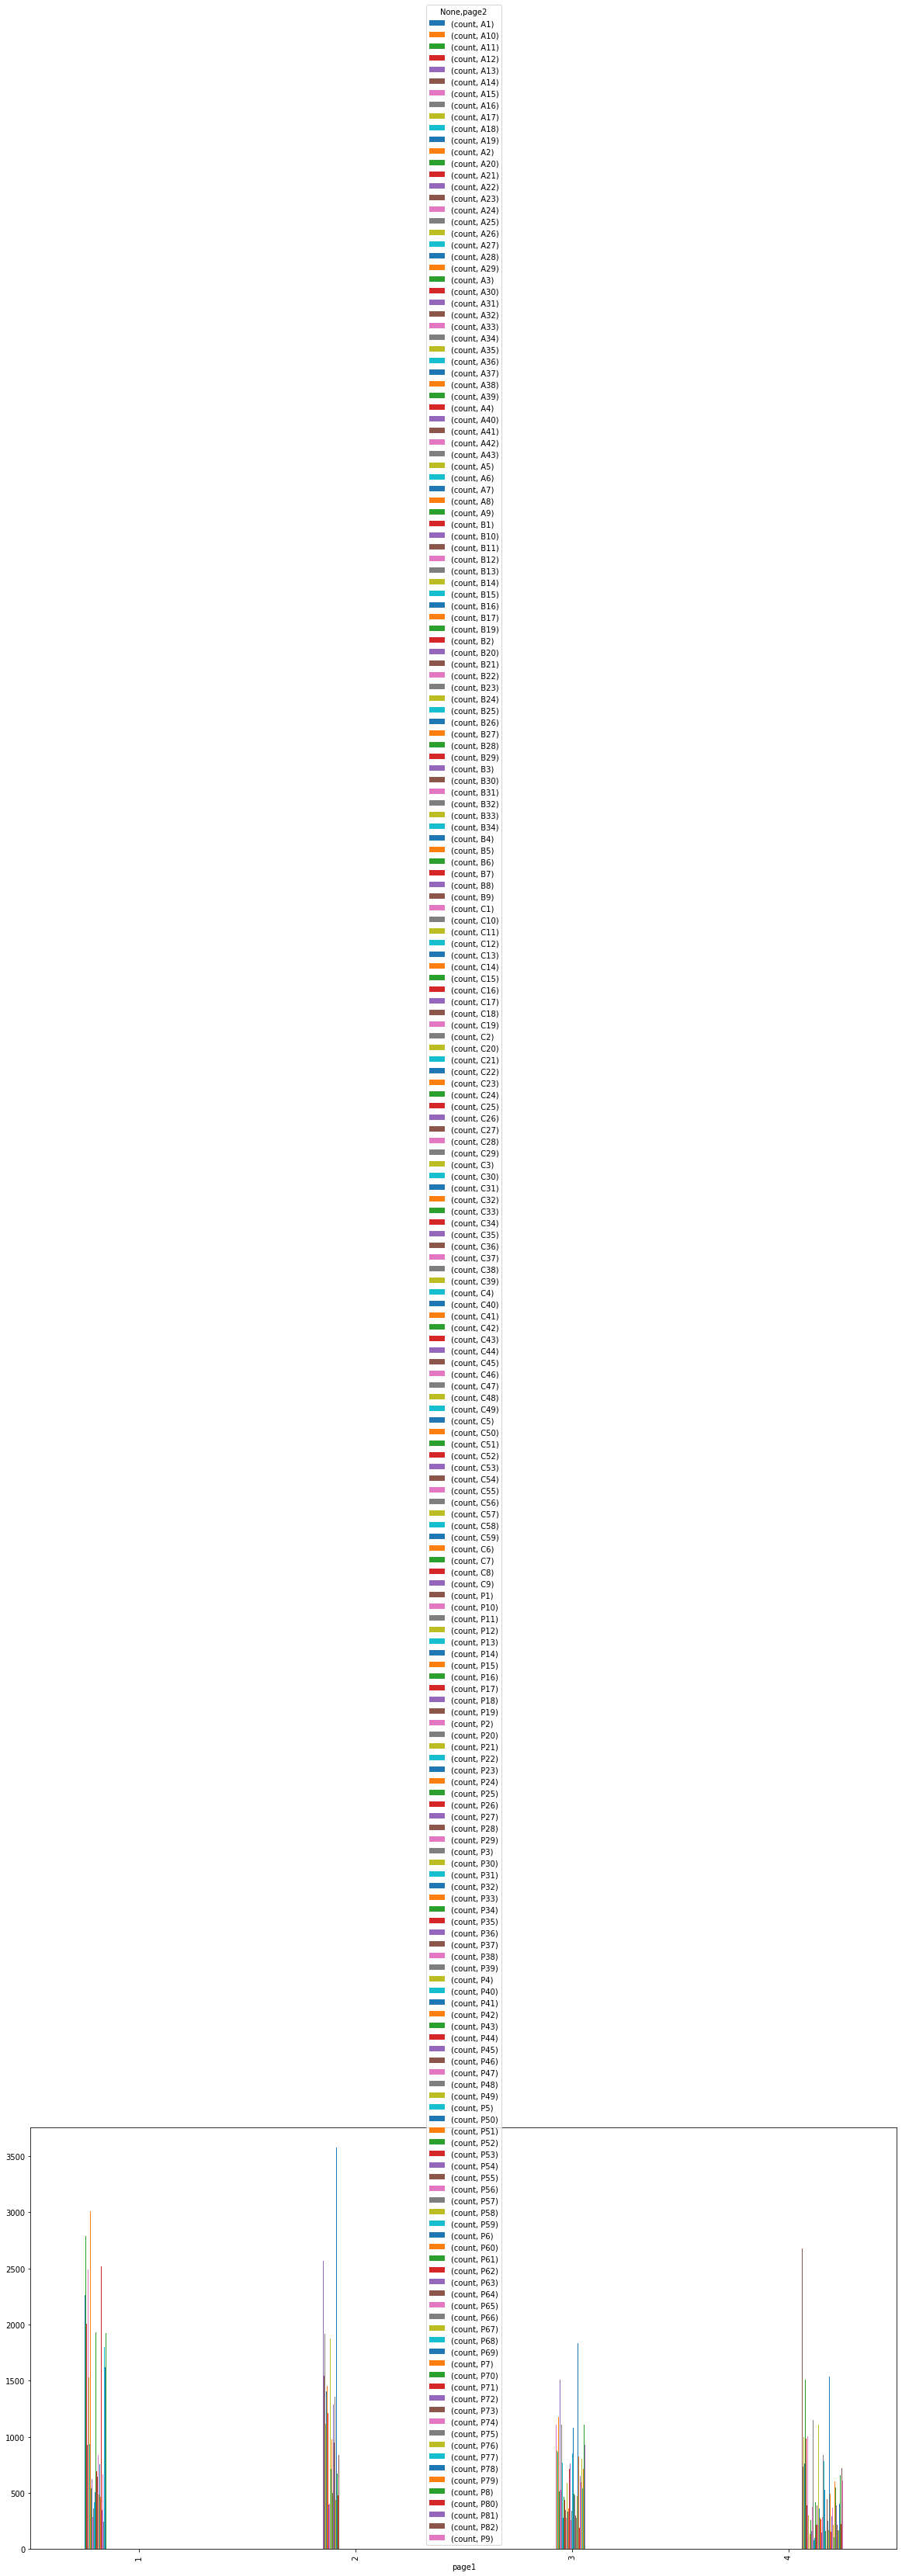

In [13]:
df_pivot = pd.pivot_table(data, values='price',index="page1",columns='page2',aggfunc=['count'])
ax = df_pivot.plot(kind="bar")
fig = ax.get_figure()
fig.set_size_inches(20, 10)

In [14]:
blank=np.zeros(data.shape[0])
data['order_id']=blank
data['order_id'][0]=int(1)

<ipython-input-14-eb374acf10fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['order_id'][0]=int(1)


In [15]:
for i in range(1,data.shape[0]):
    if data['order'][i-1]+1==data['order'][i]:
        data['order_id'][i]=data['order_id'][i-1]
    if data['order'][i]==1:
        data['order_id'][i]=data['order_id'][i-1]+1

<ipython-input-15-b8f5734438f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['order_id'][i]=data['order_id'][i-1]
<ipython-input-15-b8f5734438f5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['order_id'][i]=data['order_id'][i-1]+1


In [17]:
data

,year,month,day,order,country,session ID,page1,page2,colour,location,model photography,price,price 2,page,date,order_id
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1,2008-04-01,1.0
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1,2008-04-01,1.0
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1,2008-04-01,1.0
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1,2008-04-01,1.0
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1,2008-04-01,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165469,2008,8,13,1,29,24024,2,B10,2,4,1,67,1,1,2008-08-13,24024.0
165470,2008,8,13,1,9,24025,1,A11,3,4,1,62,1,1,2008-08-13,24025.0
165471,2008,8,13,1,34,24026,1,A2,3,1,1,43,2,1,2008-08-13,24026.0
165472,2008,8,13,2,34,24026,3,C2,12,1,1,43,1,1,2008-08-13,24026.0


In [20]:
basket_29 = (data[data['country']==29]
          .groupby(['order_id','page2'])['session ID']
          .count().unstack().reset_index().fillna(0)
          .set_index('order_id'))

In [21]:
basket_29

page2,A1,A10,A11,A12,A13,A14,A15,A16,A17,A18,...,P75,P76,P77,P78,P79,P8,P80,P81,P82,P9
order_id,,,,,,,,,,,,,,,,,,,,,
1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24020.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24021.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24022.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
def hot_encode(x):
    if(x<= 0):
        return 0
    if(x>= 1):
        return 1

In [23]:
basket_encoded = basket_29.applymap(hot_encode)
basket_29 = basket_encoded

In [24]:
basket_29

page2,A1,A10,A11,A12,A13,A14,A15,A16,A17,A18,...,P75,P76,P77,P78,P79,P8,P80,P81,P82,P9
order_id,,,,,,,,,,,,,,,,,,,,,
1.0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2.0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7.0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9.0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
12.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24020.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24021.0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
24022.0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
frequent_itemsets=apriori(basket_29,min_support=0.03,use_colnames=True)
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(A1),(A2),0.085282,0.099428,0.033858,0.397006,3.992897,0.025378,1.493501
1,(A2),(A1),0.099428,0.085282,0.033858,0.340524,3.992897,0.025378,1.387037
2,(A2),(A11),0.099428,0.097641,0.032121,0.323061,3.308673,0.022413,1.333000
3,(A11),(A2),0.097641,0.099428,0.032121,0.328975,3.308673,0.022413,1.342084
4,(A2),(A5),0.099428,0.071443,0.031406,0.315871,4.421285,0.024303,1.357282


In [26]:
rules[(rules['lift']>2)&
    (rules['confidence']>=0.3)
]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(A1),(A2),0.085282,0.099428,0.033858,0.397006,3.992897,0.025378,1.493501
1,(A2),(A1),0.099428,0.085282,0.033858,0.340524,3.992897,0.025378,1.387037
2,(A2),(A11),0.099428,0.097641,0.032121,0.323061,3.308673,0.022413,1.333000
3,(A11),(A2),0.097641,0.099428,0.032121,0.328975,3.308673,0.022413,1.342084
4,(A2),(A5),0.099428,0.071443,0.031406,0.315871,4.421285,0.024303,1.357282
5,(A5),(A2),0.071443,0.099428,0.031406,0.439600,4.421285,0.024303,1.607016
6,(B10),(B13),0.104586,0.077673,0.037943,0.362793,4.670751,0.029819,1.447452
7,(B13),(B10),0.077673,0.104586,0.037943,0.488494,4.670751,0.029819,1.750546


In [102]:
data['country'].unique()

array([29, 21,  9, 16, 38, 24, 41, 12, 31, 44, 34, 28, 46, 15, 10, 27,  7,
       25, 20, 17, 22, 19, 42,  8,  3, 37, 30, 14, 43, 23, 47, 36,  2, 33,
       32, 45, 18, 11, 40,  6, 39,  1, 35, 13,  4, 26,  5], dtype=int64)

In [27]:
basket_21 = (data[data['country']==21]
          .groupby(['order_id','page2'])['session ID']
          .count().unstack().reset_index().fillna(0)
          .set_index('order_id'))

In [28]:
basket_encoded = basket_21.applymap(hot_encode)
basket_21 = basket_encoded

In [40]:
frequent_itemsets=apriori(basket_21,min_support=0.03,use_colnames=True)
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(A1),(A2),0.098039,0.166667,0.058824,0.600000,3.600000,0.042484,2.083333
1,(A2),(A1),0.166667,0.098039,0.058824,0.352941,3.600000,0.042484,1.393939
2,(A10),(A5),0.078431,0.225490,0.039216,0.500000,2.217391,0.021530,1.549020
3,(A5),(A10),0.225490,0.078431,0.039216,0.173913,2.217391,0.021530,1.115583
4,(A2),(A11),0.166667,0.137255,0.049020,0.294118,2.142857,0.026144,1.222222


In [41]:
rules[(rules['lift']>6)&
    (rules['confidence']>=0.8)
]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
14,(P72),(A11),0.039216,0.137255,0.039216,1.000000,7.285714,0.033833,inf
64,(B9),(B1),0.049020,0.107843,0.039216,0.800000,7.418182,0.033929,4.460784
78,(B19),(B23),0.049020,0.049020,0.039216,0.800000,16.320000,0.036813,4.754902
79,(B23),(B19),0.049020,0.049020,0.039216,0.800000,16.320000,0.036813,4.754902
89,(P20),(C11),0.049020,0.098039,0.039216,0.800000,8.160000,0.034410,4.509804
94,(C27),(C5),0.039216,0.098039,0.039216,1.000000,10.200000,0.035371,inf
105,(P14),(P1),0.058824,0.127451,0.049020,0.833333,6.538462,0.041522,5.235294
106,(P51),(P1),0.049020,0.127451,0.039216,0.800000,6.276923,0.032968,4.362745
108,(P72),(P1),0.039216,0.127451,0.039216,1.000000,7.846154,0.034218,inf
124,"(A5, P1)",(A11),0.039216,0.137255,0.039216,1.000000,7.285714,0.033833,inf


In [30]:
basket_9 = (data[data['country']==9]
          .groupby(['order_id','page2'])['session ID']
          .count().unstack().reset_index().fillna(0)
          .set_index('order_id'))

In [31]:
basket_encoded = basket_9.applymap(hot_encode)
basket_9 = basket_encoded

In [42]:
frequent_itemsets=apriori(basket_9,min_support=0.03,use_colnames=True)
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(A1),(A10),0.110571,0.130031,0.035825,0.32400,2.491714,0.021447,1.286936
1,(A10),(A1),0.130031,0.110571,0.035825,0.27551,2.491714,0.021447,1.227663
2,(A1),(A11),0.110571,0.158337,0.040248,0.36400,2.298894,0.022740,1.323369
3,(A11),(A1),0.158337,0.110571,0.040248,0.25419,2.298894,0.022740,1.192568
4,(A1),(A12),0.110571,0.139319,0.039805,0.36000,2.584000,0.024401,1.344814


In [43]:
rules[(rules['lift']>6)&
    (rules['confidence']>=0.8)
]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
711,"(A6, A10, A5)",(A3),0.034498,0.137992,0.030517,0.884615,6.410626,0.025757,7.470736
740,"(A6, A2, A5)",(A3),0.037594,0.137992,0.031844,0.847059,6.138462,0.026657,5.636206
796,"(A6, A5, A7)",(A3),0.034056,0.137992,0.030075,0.883117,6.399767,0.025376,7.374957
810,"(A6, A8, A5)",(A3),0.038036,0.137992,0.032729,0.860465,6.235614,0.027480,6.177724
839,"(A8, A5, A7)",(A3),0.035383,0.137992,0.030960,0.875000,6.340946,0.026077,6.896064


In [44]:
basket_16 = (data[data['country']==16]
          .groupby(['order_id','page2'])['session ID']
          .count().unstack().reset_index().fillna(0)
          .set_index('order_id'))

In [45]:
basket_encoded = basket_16.applymap(hot_encode)
basket_16 = basket_encoded

In [46]:
frequent_itemsets=apriori(basket_16,min_support=0.03,use_colnames=True)
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(A1),(A10),0.138614,0.128713,0.059406,0.428571,3.329670,0.041565,1.524752
1,(A10),(A1),0.128713,0.138614,0.059406,0.461538,3.329670,0.041565,1.599717
2,(A1),(A11),0.138614,0.118812,0.049505,0.357143,3.005952,0.033036,1.370737
3,(A11),(A1),0.118812,0.138614,0.049505,0.416667,3.005952,0.033036,1.476662
4,(A1),(A12),0.138614,0.099010,0.039604,0.285714,2.885714,0.025880,1.261386


In [47]:
rules[(rules['lift']>6)&
    (rules['confidence']>=0.8)
]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
103,(A7),(A5),0.069307,0.118812,0.059406,0.857143,7.214286,0.051171,6.168317
109,(A7),(A6),0.069307,0.138614,0.059406,0.857143,6.183673,0.049799,6.029703
121,(A8),(A9),0.069307,0.108911,0.059406,0.857143,7.870130,0.051858,6.237624
138,(B7),(B1),0.039604,0.108911,0.039604,1.000000,9.181818,0.035291,inf
143,(B11),(B10),0.069307,0.118812,0.059406,0.857143,7.214286,0.051171,6.168317
...,...,...,...,...,...,...,...,...,...
3682,"(B24, B31)","(B32, B30, B25, B19, B3)",0.039604,0.039604,0.039604,1.000000,25.250000,0.038035,inf
3683,"(B3, B31)","(B32, B30, B25, B19, B24)",0.039604,0.039604,0.039604,1.000000,25.250000,0.038035,inf
3684,"(B24, B19)","(B32, B30, B31, B25, B3)",0.039604,0.039604,0.039604,1.000000,25.250000,0.038035,inf
3685,"(B19, B3)","(B32, B30, B31, B25, B24)",0.039604,0.039604,0.039604,1.000000,25.250000,0.038035,inf


In [51]:
basket_38 = (data[data['country']==38]
          .groupby(['order_id','page2'])['session ID']
          .count().unstack().reset_index().fillna(0)
          .set_index('order_id'))
basket_encoded = basket_38.applymap(hot_encode)
basket_38 = basket_encoded
frequent_itemsets=apriori(basket_38,min_support=0.03,use_colnames=True)
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=1)
rules.head()
rules[(rules['lift']>6)&
    (rules['confidence']>=0.8)
]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(A1),(A2),0.04,0.12,0.04,1.0,8.333333,0.0352,inf
2,(A1),(A5),0.04,0.08,0.04,1.0,12.500000,0.0368,inf
4,(A17),(A11),0.04,0.08,0.04,1.0,12.500000,0.0368,inf
12,(P12),(A11),0.04,0.08,0.04,1.0,12.500000,0.0368,inf
14,(P6),(A11),0.04,0.08,0.04,1.0,12.500000,0.0368,inf
...,...,...,...,...,...,...,...,...,...
78860,(C12),"(C6, C31, C17, C2, C29, B4, B14, C53, A29)",0.04,0.04,0.04,1.0,25.000000,0.0384,inf
78862,(C31),"(C12, C6, C17, C2, C29, B4, B14, C53, A29)",0.04,0.04,0.04,1.0,25.000000,0.0384,inf
78865,(C29),"(C12, C6, C31, C17, C2, B4, B14, C53, A29)",0.04,0.04,0.04,1.0,25.000000,0.0384,inf
78866,(B4),"(C12, C6, C31, C17, C2, C29, B14, C53, A29)",0.04,0.04,0.04,1.0,25.000000,0.0384,inf


In [52]:
basket_24 = (data[data['country']==24]
          .groupby(['order_id','page2'])['session ID']
          .count().unstack().reset_index().fillna(0)
          .set_index('order_id'))
basket_encoded = basket_24.applymap(hot_encode)
basket_24 = basket_encoded
frequent_itemsets=apriori(basket_24,min_support=0.03,use_colnames=True)
rules=association_rules(frequent_itemsets,metric='lift',min_threshold=1)
rules.head()
rules[(rules['lift']>6)&
    (rules['confidence']>=0.8)
]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [53]:
def predict_sequence(country_code):
    basket= (data[data['country']==country_code]
          .groupby(['order_id','page2'])['session ID']
          .count().unstack().reset_index().fillna(0)
          .set_index('order_id'))
    basket_encoded = basket.applymap(hot_encode)
    basket = basket_encoded
    frequent_itemsets=apriori(basket,min_support=0.03,use_colnames=True)
    rules=association_rules(frequent_itemsets,metric='lift',min_threshold=1)
    rules.head()
    return rules[(rules['lift']>6)&
    (rules['confidence']>=0.8)]

In [54]:
predict_sequence(41)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(A42),(B13),0.039370,0.086614,0.031496,0.8,9.236364,0.028086,4.566929
32,(P2),(P1),0.039370,0.094488,0.031496,0.8,8.466667,0.027776,4.527559
36,"(B11, B4)",(B12),0.031496,0.055118,0.031496,1.0,18.142857,0.029760,inf
37,"(B11, B12)",(B4),0.031496,0.102362,0.031496,1.0,9.769231,0.028272,inf
38,"(B4, B12)",(B11),0.031496,0.078740,0.031496,1.0,12.700000,0.029016,inf


In [55]:
predict_sequence(12)

MemoryError: Unable to allocate 7.29 GiB for an array with shape (5824501, 6, 28) and data type int64

In [56]:
predict_sequence(31)

MemoryError: Unable to allocate 44.2 GiB for an array with shape (98776363, 6, 10) and data type int64

In [61]:
predict_sequence(44)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [62]:
predict_sequence(34)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(A1),(A4),0.056818,0.090909,0.045455,0.800000,8.800000,0.040289,4.545455
15,(A1),(B10),0.056818,0.068182,0.045455,0.800000,11.733333,0.041581,4.659091
16,(A10),(A12),0.090909,0.136364,0.079545,0.875000,6.416667,0.067149,6.909091
45,(A7),(A12),0.068182,0.136364,0.056818,0.833333,6.111111,0.047521,5.181818
46,(A8),(A12),0.090909,0.136364,0.079545,0.875000,6.416667,0.067149,6.909091
...,...,...,...,...,...,...,...,...,...
14764,"(A12, A5, A7)","(A9, A6, A3, A2, A8)",0.034091,0.034091,0.034091,1.000000,29.333333,0.032929,inf
14766,"(A8, A2, A5)","(A9, A6, A3, A12, A7)",0.034091,0.034091,0.034091,1.000000,29.333333,0.032929,inf
14767,"(A2, A5, A7)","(A9, A6, A3, A12, A8)",0.034091,0.045455,0.034091,1.000000,22.000000,0.032541,inf
14769,"(A8, A5, A7)","(A9, A6, A3, A12, A2)",0.034091,0.034091,0.034091,1.000000,29.333333,0.032929,inf


In [63]:
predict_sequence(28)

KeyboardInterrupt: 

In [64]:
predict_sequence(46)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [65]:
predict_sequence(15)

KeyboardInterrupt: 

In [66]:
predict_sequence(10)

MemoryError: Unable to allocate 7.08 GiB for an array with shape (5163622, 8, 23) and data type int64

In [67]:
predict_sequence(27)

MemoryError: Unable to allocate 13.2 GiB for an array with shape (9700146, 7, 26) and data type int64

In [68]:
predict_sequence(7)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [69]:
predict_sequence(25)

MemoryError: Unable to allocate 6.43 GiB for an array with shape (19182526, 9, 5) and data type int64

In [70]:
predict_sequence(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [71]:
predict_sequence(17)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [72]:
predict_sequence(22)

MemoryError: Unable to allocate 11.9 GiB for an array with shape (14316483, 7, 16) and data type int64

In [73]:
predict_sequence(19)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [74]:
predict_sequence(42)

MemoryError: Unable to allocate 16.7 GiB for an array with shape (10795736, 8, 26) and data type int64

In [75]:
predict_sequence(8)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [76]:
predict_sequence(3)

MemoryError: Unable to allocate 27.1 GiB for an array with shape (30345223, 6, 20) and data type int64

In [77]:
predict_sequence(37)

MemoryError: Unable to allocate 20.1 GiB for an array with shape (22474309, 8, 15) and data type int64

In [78]:
predict_sequence(30)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [79]:
predict_sequence(14)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(A15),(A12),0.142857,0.142857,0.142857,1.0,7.0,0.122449,inf
1,(A12),(A15),0.142857,0.142857,0.142857,1.0,7.0,0.122449,inf
2,(A12),(A16),0.142857,0.142857,0.142857,1.0,7.0,0.122449,inf
3,(A16),(A12),0.142857,0.142857,0.142857,1.0,7.0,0.122449,inf
6,(A12),(A21),0.142857,0.142857,0.142857,1.0,7.0,0.122449,inf
...,...,...,...,...,...,...,...,...,...
364753,(C57),"(C18, B13, B12, A31, A32, A42, C14, B23, B2, A17)",0.142857,0.142857,0.142857,1.0,7.0,0.122449,inf
364754,(C18),"(C57, B13, B12, A31, A32, A42, C14, B23, B2, A17)",0.142857,0.142857,0.142857,1.0,7.0,0.122449,inf
364757,(A31),"(C57, C18, B13, B12, A32, A42, C14, B23, B2, A17)",0.142857,0.142857,0.142857,1.0,7.0,0.122449,inf
364759,(A42),"(C57, C18, B13, B12, A31, A32, C14, B23, B2, A17)",0.142857,0.142857,0.142857,1.0,7.0,0.122449,inf


In [80]:
predict_sequence(43)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


In [81]:
predict_sequence(23)


KeyboardInterrupt



In [ ]:
predict_sequence(47)

In [ ]:
predict_sequence(36)

In [ ]:
predict_sequence(2)

In [ ]:
predict_sequence(33)

In [ ]:
predict_sequence(32)

In [ ]:
predict_sequence(45)

In [ ]:
predict_sequence(18)

In [ ]:
predict_sequence(11)

In [ ]:
predict_sequence(40)

In [ ]:
predict_sequence(6)

In [ ]:
predict_sequence(39)

In [ ]:
predict_sequence(1)

In [ ]:
predict_sequence(35)

In [ ]:
predict_sequence(13)

In [ ]:
predict_sequence(4)

In [ ]:
predict_sequence(26)

In [ ]:
predict_sequence(5)